In [1]:
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patheffects import Stroke, Normal
import numpy as np
import toml
from datetime import datetime
import pandas as pd
import re
from typing import Union
import os

In [2]:
URL_IMAGE = "./shots/leuven_tiensesteenweg_20231017-114236.png"
image = Path(URL_IMAGE)
assert image.exists()

In [3]:
im = cv2.cvtColor(cv2.imread(image.as_posix()), cv2.COLOR_BGR2RGB)

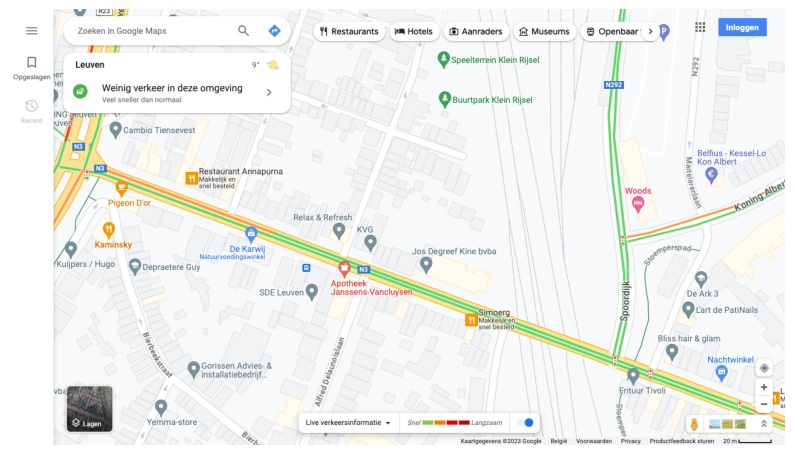

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
plt.imshow(im);

In [5]:
def display_shot(url:  Union[str, os.PathLike]):
    if isinstance(url, str):
        image = Path(url)
    elif isinstance(url, os.PathLike):
        image = url
    else:
        raise TypeError("url must be a string or a path object")
    assert image.exists()
    im = cv2.cvtColor(cv2.imread(image.as_posix()), cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_axis_off()
    ax.imshow(im);
    return ax

In [6]:
# Open the TOML file
with open("config.toml", "r") as f:
    # Load the contents of the file into a dictionary
    config = toml.load(f)

# Print the values
print(config)

{'leuven': {'geldenaaksepoort': {'url': 'https://www.google.com/maps/@50.8726718,4.7131464,18z/data=!5m1!1e1'}, 'tiensevest': {'url': 'https://www.google.com/maps/@50.8747536,4.713817,17.97z/data=!5m1!1e1'}, 'tiensesteenweg': {'url': 'https://www.google.com/maps/@50.8733218,4.7172716,18z/data=!5m1!1e1', 'points': [[164, 268], [187, 276], [207, 283], [225, 290], [247, 299], [270, 307], [290, 315], [314, 324], [341, 334], [368, 344], [395, 354], [421, 364], [448, 374], [473, 383], [500, 394], [530, 405], [603, 432], [625, 441], [647, 449], [675, 458], [699, 467], [728, 478], [761, 490], [849, 522], [879, 534], [904, 543], [928, 552], [953, 561], [983, 572], [1028, 589], [1082, 607], [1123, 623], [1163, 638], [1194, 649]]}, 'tiensestraat': {'url': 'https://www.google.com/maps/@50.8748008,4.7106216,17z/data=!5m1!1e1'}}}


In [7]:
streets = list(config["leuven"].keys())
streets

['geldenaaksepoort', 'tiensevest', 'tiensesteenweg', 'tiensestraat']

In [8]:
mosaic = [
    [streets[3], streets[0]],
    [streets[1], streets[2]]
]

In [9]:
plt.rc('axes.spines', top=False, right=False)

In [10]:
URL_IMAGE_DIR = "shots"
url_image_dir = Path(URL_IMAGE_DIR)
assert url_image_dir.exists()
location = "leuven"

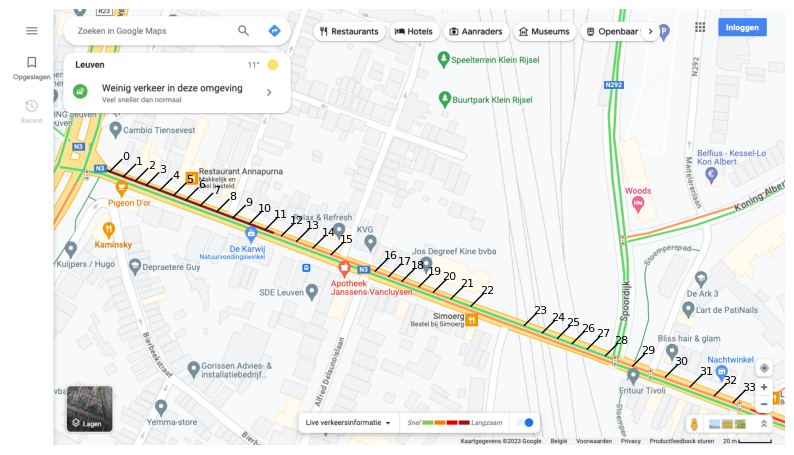

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
location = "leuven"
street = "tiensesteenweg"

text_offset = 6
line_offset = 20

street_offsets = {"tiensestraat": [-line_offset, line_offset, -text_offset, text_offset, "center", "center"],
                  "tiensevest": [-line_offset, -line_offset, -text_offset, -text_offset, "center", "center"],
                  "geldenaaksepoort": [line_offset, line_offset, text_offset, text_offset, "center", "center"],
                  "tiensesteenweg": [line_offset, -line_offset, text_offset, -text_offset, "center", "center"]}

img_url_path = next(url_image_dir.glob(f"{location}_{street}_*.png"))
im = cv2.cvtColor(cv2.imread(img_url_path.as_posix()), cv2.COLOR_BGR2RGB)
ax.spines[:].set_visible(False)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.imshow(im)
for i, p in enumerate(config[location][street]["points"]):
    x, y = p[0], p[1]
    x_end, y_end = x + street_offsets[street][0], y + street_offsets[street][1]
    ax.plot([x, x_end], [y, y_end], color="k", linewidth=1)
    ax.annotate(
        f"{i}",
        xy=(x_end, y_end),
        xytext=(x_end + street_offsets[street][2], y_end + street_offsets[street][3]),
        fontsize=8,
        ha=street_offsets[street][4],
        va=street_offsets[street][5],
    )
plt.savefig(
    "meetpunten_leuven_tiensesteenweg.png",  # Set path and filename
    dpi=300,  # Set dots per inch
    bbox_inches="tight",  # Remove extra whitespace around plot
    facecolor="white",
)  # Set background color to white

In [12]:
point_annots_defaults = {
    'xytext': (10, 10), 'textcoords': 'offset points', 
    # "xycoords": "data",
    'fontsize': 'x-small', 'ha': 'left', 'va': 'bottom', 
    'arrowprops': {
        'arrowstyle': '-', 'connectionstyle': 'angle', 'shrinkB': 0
    }
}

In [13]:
# fig, axd = plt.subplot_mosaic(
#     mosaic, gridspec_kw={"width_ratios": [1, 1], "wspace": 0.2}, figsize=(16, 9)
# )

# for title, ax in axd.items():
#     ax.set_title(title, size="large", loc="left")

# text_offset = 6
# line_offset = 20

# street_offsets = {"tiensestraat": [-line_offset, line_offset, -text_offset, text_offset, "center", "center"],
#                   "tiensevest": [-line_offset, -line_offset, -text_offset, -text_offset, "center", "center"],
#                   "geldenaaksepoort": [line_offset, line_offset, text_offset, text_offset, "center", "center"],
#                   "tiensesteenweg": [line_offset, -line_offset, text_offset, -text_offset, "center", "center"]}

# for street in streets:
#     if street != "tiensesteenweg":
#         continue
#     img_url_path = next(url_image_dir.glob(f"{location}_{street}_*.png"))
#     im = cv2.cvtColor(cv2.imread(img_url_path.as_posix()), cv2.COLOR_BGR2RGB)
#     axd[street].spines[:].set_visible(False)
#     axd[street].yaxis.set_visible(False)
#     axd[street].xaxis.set_visible(False)
#     axd[street].imshow(im)
#     for i, p in enumerate(config[location][street]["points"]):
#         x, y = p[0], p[1]
#         x_end, y_end = x + street_offsets[street][0], y + street_offsets[street][1]
#         axd[street].plot([x, x_end], [y, y_end], color="k", linewidth=1)
#         axd[street].annotate(
#             f"{i}",
#             xy=(x_end, y_end),
#             xytext=(x_end + street_offsets[street][2], y_end + street_offsets[street][3]),
#             fontsize=8,
#             ha=street_offsets[street][4],
#             va=street_offsets[street][5],
#         )

# # display(fig)

In [14]:
max_points = 0
for location in config.keys():
    for street in config[location].keys():
        print (f"{location=} {street=}")
        if not "points" in config[location][street]:
            continue
        number_of_points = len(config[location][street]["points"])
        if number_of_points > max_points:
            max_points = number_of_points
            max_location = location
            max_street = street
print(f"Maximum number of measurement points is {max_points} in {max_street} in {location}")

location='leuven' street='geldenaaksepoort'
location='leuven' street='tiensevest'
location='leuven' street='tiensesteenweg'
location='leuven' street='tiensestraat'
Maximum number of measurement points is 34 in tiensesteenweg in leuven


# Walk over screenshots and sample pixel colors

In [15]:
rows = []
for location in config.keys():
    for street in config[location].keys():
        for p in url_image_dir.glob(f"{location}_{street}_*.png"):
            # print (p.stem)
            timestamp = datetime.strptime(p.stem, f"{location}_{street}_%Y%m%d-%H%M%S")
            if timestamp < datetime(2023, 10, 17, 15, 55, 0):
                # print(f"Skipped {p.stem}")
                continue
            print(timestamp)
            screenshot = cv2.cvtColor(cv2.imread(p.as_posix()), cv2.COLOR_BGR2RGB)
            colors = ()
            if not "points"in config[location][street]:
                continue
            for point in config[location][street]["points"]:
                color = screenshot[point[1], point[0]]
                print(color)
                colors += (color, color[0], color[1], color[2])
            row = (location, street, p, timestamp) + colors
            rows.append(row)

2023-10-17 17:41:19
2023-10-17 18:07:16
2023-10-17 16:13:04
2023-10-17 15:57:28
2023-10-17 17:25:46
2023-10-17 16:59:46
2023-10-17 16:28:39
2023-10-17 17:20:34
2023-10-17 16:07:52
2023-10-17 18:02:05
2023-10-17 17:10:10
2023-10-17 16:23:27
2023-10-17 16:02:40
2023-10-17 17:46:31
2023-10-17 17:36:08
2023-10-17 16:44:13
2023-10-17 17:56:54
2023-10-17 17:04:58
2023-10-17 16:18:16
2023-10-17 16:33:50
2023-10-17 16:39:01
2023-10-17 17:51:42
2023-10-17 17:30:57
2023-10-17 17:15:22
2023-10-17 16:54:35
2023-10-17 16:49:24
2023-10-17 16:44:16
2023-10-17 16:33:53
2023-10-17 18:02:08
2023-10-17 17:05:00
2023-10-17 17:56:56
2023-10-17 16:28:42
2023-10-17 16:39:04
2023-10-17 18:07:19
2023-10-17 16:49:27
2023-10-17 15:57:31
2023-10-17 17:25:49
2023-10-17 16:59:49
2023-10-17 17:15:25
2023-10-17 17:51:45
2023-10-17 17:31:00
2023-10-17 17:41:22
2023-10-17 17:20:37
2023-10-17 16:07:55
2023-10-17 16:54:38
2023-10-17 16:13:07
2023-10-17 17:10:13
2023-10-17 17:36:11
2023-10-17 16:23:30
2023-10-17 16:02:43


In [16]:
rows[0]

('leuven',
 'tiensesteenweg',
 PosixPath('shots/leuven_tiensesteenweg_20231017-170504.png'),
 datetime.datetime(2023, 10, 17, 17, 5, 4),
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([255, 151,  77], dtype=uint8),
 255,
 151,
 77,
 array([255, 151,  77], dtype=uint8),
 255,
 151,
 77,
 array([255, 151,  77], dtype=uint8),
 255,
 151,
 77,
 array([255, 151,  77], dtype=uint8),
 255,
 151,


In [17]:
all_columns = ["location", "street", "path", "timestamp"]
for i in range(max_points):
    all_columns.extend((f"color_{i}", f"p{i}_red", f"p{i}_green", f"p{i}_blue"))
all_columns

['location',
 'street',
 'path',
 'timestamp',
 'color_0',
 'p0_red',
 'p0_green',
 'p0_blue',
 'color_1',
 'p1_red',
 'p1_green',
 'p1_blue',
 'color_2',
 'p2_red',
 'p2_green',
 'p2_blue',
 'color_3',
 'p3_red',
 'p3_green',
 'p3_blue',
 'color_4',
 'p4_red',
 'p4_green',
 'p4_blue',
 'color_5',
 'p5_red',
 'p5_green',
 'p5_blue',
 'color_6',
 'p6_red',
 'p6_green',
 'p6_blue',
 'color_7',
 'p7_red',
 'p7_green',
 'p7_blue',
 'color_8',
 'p8_red',
 'p8_green',
 'p8_blue',
 'color_9',
 'p9_red',
 'p9_green',
 'p9_blue',
 'color_10',
 'p10_red',
 'p10_green',
 'p10_blue',
 'color_11',
 'p11_red',
 'p11_green',
 'p11_blue',
 'color_12',
 'p12_red',
 'p12_green',
 'p12_blue',
 'color_13',
 'p13_red',
 'p13_green',
 'p13_blue',
 'color_14',
 'p14_red',
 'p14_green',
 'p14_blue',
 'color_15',
 'p15_red',
 'p15_green',
 'p15_blue',
 'color_16',
 'p16_red',
 'p16_green',
 'p16_blue',
 'color_17',
 'p17_red',
 'p17_green',
 'p17_blue',
 'color_18',
 'p18_red',
 'p18_green',
 'p18_blue',
 'col

In [18]:
df = pd.DataFrame(rows, columns=all_columns).sort_values(by="timestamp")
df.head()

,location,street,path,timestamp,color_0,p0_red,p0_green,p0_blue,color_1,p1_red,...,p31_green,p31_blue,color_32,p32_red,p32_green,p32_blue,color_33,p33_red,p33_green,p33_blue
6,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-155734.png,2023-10-17 15:57:34,"[129, 31, 31]",129,31,31,"[129, 31, 31]",129,...,60,50,"[242, 60, 50]",242,60,50,"[242, 60, 50]",242,60,50
17,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-160247.png,2023-10-17 16:02:47,"[129, 31, 31]",129,31,31,"[129, 31, 31]",129,...,60,50,"[242, 60, 50]",242,60,50,"[242, 60, 50]",242,60,50
7,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-160758.png,2023-10-17 16:07:58,"[129, 31, 31]",129,31,31,"[129, 31, 31]",129,...,151,77,"[255, 151, 77]",255,151,77,"[255, 151, 77]",255,151,77
9,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-161310.png,2023-10-17 16:13:10,"[129, 31, 31]",129,31,31,"[129, 31, 31]",129,...,151,77,"[255, 151, 77]",255,151,77,"[255, 151, 77]",255,151,77
22,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-161822.png,2023-10-17 16:18:22,"[129, 31, 31]",129,31,31,"[129, 31, 31]",129,...,214,104,"[99, 214, 104]",99,214,104,"[99, 214, 104]",99,214,104


In [19]:
df.tail()

,location,street,path,timestamp,color_0,p0_red,p0_green,p0_blue,color_1,p1_red,...,p31_green,p31_blue,color_32,p32_red,p32_green,p32_blue,color_33,p33_red,p33_green,p33_blue
18,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-174637.png,2023-10-17 17:46:37,"[242, 60, 50]",242,60,50,"[242, 60, 50]",242,...,151,77,"[255, 151, 77]",255,151,77,"[255, 151, 77]",255,151,77
11,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-175148.png,2023-10-17 17:51:48,"[242, 60, 50]",242,60,50,"[242, 60, 50]",242,...,60,50,"[242, 60, 50]",242,60,50,"[242, 60, 50]",242,60,50
23,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-175659.png,2023-10-17 17:56:59,"[242, 60, 50]",242,60,50,"[242, 60, 50]",242,...,151,77,"[255, 151, 77]",255,151,77,"[255, 151, 77]",255,151,77
16,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,2023-10-17 18:02:10,"[242, 60, 50]",242,60,50,"[242, 60, 50]",242,...,151,77,"[255, 151, 77]",255,151,77,"[255, 151, 77]",255,151,77
4,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180722.png,2023-10-17 18:07:22,"[242, 60, 50]",242,60,50,"[242, 60, 50]",242,...,214,104,"[99, 214, 104]",99,214,104,"[99, 214, 104]",99,214,104


## Inspect the dataframe

In [20]:
df["color_0"].astype(str).unique()

array(['[129  31  31]', '[242  60  50]', '[255 151  77]'], dtype=object)

In [21]:
df["color_0"].astype(str).value_counts()

color_0
[129  31  31]    14
[242  60  50]     7
[255 151  77]     5
Name: count, dtype: int64

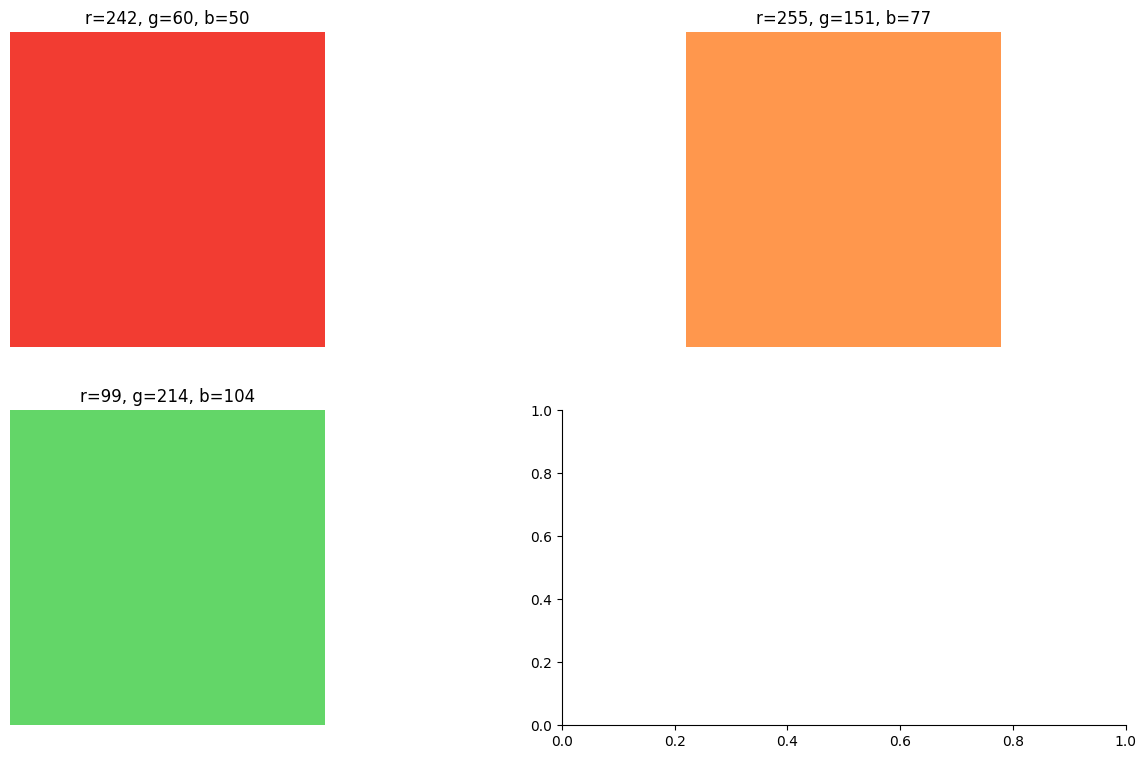

In [22]:
fig, axd = plt.subplot_mosaic(
    mosaic, gridspec_kw={"width_ratios": [1, 1], "wspace": 0.2}, figsize=(16, 9)
)
colors_in_measure_point = "color_13"
number_of_colors = df[colors_in_measure_point].astype(str).nunique()
assert number_of_colors < len(fig.axes), "Increase the number of axis {len(fig.axes)} to at least {number_of_colors=}"
for idx, (color, ax) in enumerate(zip(df[colors_in_measure_point].astype(str).unique(), fig.axes)):
    parts = " ".join(color.split()).split(" ")
    numbers = re.findall(r'\d+', color)
    # print (numbers[0], numbers[1], numbers[2])
    r = int(numbers[0])
    g = int(numbers[1])
    b = int(numbers[2])
    ax.set_axis_off()
    if idx < number_of_colors:
        ax.imshow([[(r, g, b)]])
        ax.set_title(f"{r=}, {g=}, {b=}")

## Debug code to find bogus color points

In [23]:
df[df["color_0"].astype(str) == "[253 226 147]"]

,location,street,path,timestamp,color_0,p0_red,p0_green,p0_blue,color_1,p1_red,...,p31_green,p31_blue,color_32,p32_red,p32_green,p32_blue,color_33,p33_red,p33_green,p33_blue


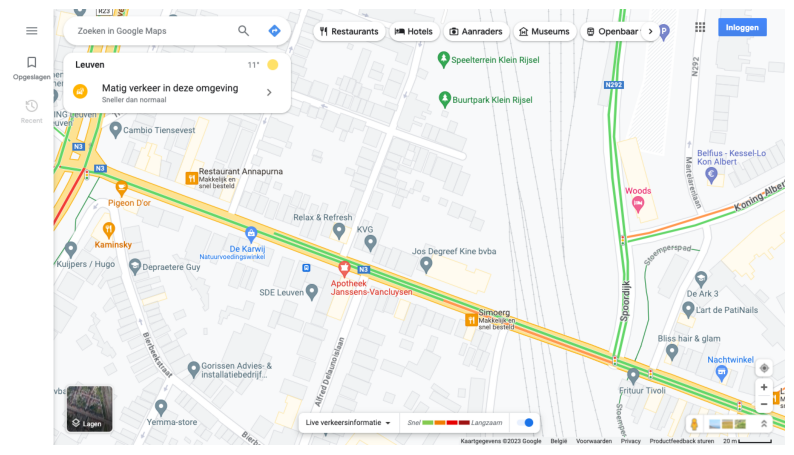

In [24]:
_ = display_shot("shots/leuven_tiensesteenweg_20231017-124438.png")

In [25]:
color_map = {
    "[129  31  31]": "darkred",
    "[242  60  50]": "red",
    "[255 151  77]": "orange",
    "[99 214 104]": "green"
 
}

In [26]:
for i in range(max_points):
    df[f"traffic_color_{i}"] = df[f"color_{i}"].astype(str).map(color_map)
df.sort_values(by="timestamp").head()

,location,street,path,timestamp,color_0,p0_red,p0_green,p0_blue,color_1,p1_red,...,traffic_color_24,traffic_color_25,traffic_color_26,traffic_color_27,traffic_color_28,traffic_color_29,traffic_color_30,traffic_color_31,traffic_color_32,traffic_color_33
6,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-155734.png,2023-10-17 15:57:34,"[129, 31, 31]",129,31,31,"[129, 31, 31]",129,...,orange,orange,orange,orange,orange,red,NaN,red,red,red
17,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-160247.png,2023-10-17 16:02:47,"[129, 31, 31]",129,31,31,"[129, 31, 31]",129,...,orange,orange,orange,orange,orange,red,NaN,red,red,red
7,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-160758.png,2023-10-17 16:07:58,"[129, 31, 31]",129,31,31,"[129, 31, 31]",129,...,NaN,NaN,NaN,NaN,NaN,orange,NaN,orange,orange,orange
9,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-161310.png,2023-10-17 16:13:10,"[129, 31, 31]",129,31,31,"[129, 31, 31]",129,...,NaN,NaN,NaN,NaN,NaN,orange,NaN,orange,orange,orange
22,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-161822.png,2023-10-17 16:18:22,"[129, 31, 31]",129,31,31,"[129, 31, 31]",129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
color_point = "color_20"
df[~df[color_point].astype(str).isin(color_map.keys())].groupby(df[color_point].astype(str)).size()

color_20
[ 99 214 104]    2
dtype: int64

In [28]:
wrong_color = "[243  80  71]"

color='[ 99 214 104]' location='leuven' street='tiensestraat'
99 214 104


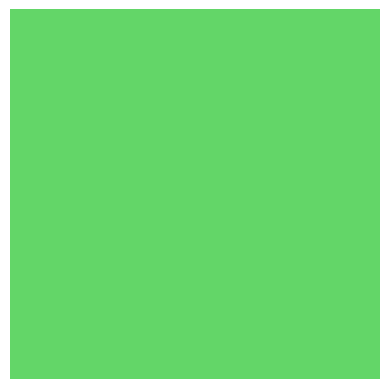

In [29]:
for color in df[~df[color_point].astype(str).isin(color_map.keys())].groupby(df[color_point].astype(str)).size().index:
    if color=='None':
        continue
    print(f"{color=} {location=} {street=}")
    parts = " ".join(color.split()).split(" ")
    numbers = re.findall(r'\d+', color)
    print (numbers[0], numbers[1], numbers[2])
    r = int(numbers[0])
    g = int(numbers[1])
    b = int(numbers[2])
    plt.axis("off")
    plt.imshow([[(r, g, b)]])
    plt.show()

In [30]:
def display_shot_region(url:  Union[str, os.PathLike], x:int, y:int, offset:int):
    if isinstance(url, str):
        image_url = Path(url)
    elif isinstance(url, os.PathLike):
        image_url = url
    else:
        raise TypeError("url must be a string or a path object")
    assert image_url.exists()
    im = cv2.cvtColor(cv2.imread(image_url.as_posix()), cv2.COLOR_BGR2RGB)
    # x, y, offset = point_coords[1], point_coords[0], 10
    xmin, xmax, ymin, ymax = x-offset, x+offset, y-offset, y+offset
    if xmax > im.shape[0]:
        xmax = im.shape[0]-1
    assert xmin >= 0
    assert xmax < im.shape[0]
    assert ymin >= 0
    assert ymax < im.shape[1]
    print (f"{xmin=}, {xmax=}, {ymin=}, {ymax=}")
    # xmin, xmax, ymin, ymax = 100, 110, 100, 110
    zoom = im[xmin:xmax, ymin:ymax, :]
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_axis_off()
    ax.imshow(zoom);
    return ax

In [31]:
df.filter(like='traffic_color', axis=1).isna().sum()

traffic_color_0      0
traffic_color_1      0
traffic_color_2      0
traffic_color_3      0
traffic_color_4      0
traffic_color_5      0
traffic_color_6      0
traffic_color_7      0
traffic_color_8      0
traffic_color_9      0
traffic_color_10     0
traffic_color_11     0
traffic_color_12     2
traffic_color_13     2
traffic_color_14     2
traffic_color_15     2
traffic_color_16     2
traffic_color_17     2
traffic_color_18     2
traffic_color_19     2
traffic_color_20     2
traffic_color_21    22
traffic_color_22    22
traffic_color_23    22
traffic_color_24    22
traffic_color_25    22
traffic_color_26    22
traffic_color_27    22
traffic_color_28    22
traffic_color_29     7
traffic_color_30    26
traffic_color_31     7
traffic_color_32     8
traffic_color_33     8
dtype: int64

# Analyse the data and make plot

In [32]:
df = df.sort_values(by="timestamp").reset_index(drop=True).copy()

In [33]:
df["street"].shape

(26,)

In [34]:
df_resampled = df.set_index("timestamp").resample("1Min").ffill()

In [35]:
all_color_indexes = [f"matplotlib_color_{i}_index" for i in range(13)]
all_color_indexes

['matplotlib_color_0_index',
 'matplotlib_color_1_index',
 'matplotlib_color_2_index',
 'matplotlib_color_3_index',
 'matplotlib_color_4_index',
 'matplotlib_color_5_index',
 'matplotlib_color_6_index',
 'matplotlib_color_7_index',
 'matplotlib_color_8_index',
 'matplotlib_color_9_index',
 'matplotlib_color_10_index',
 'matplotlib_color_11_index',
 'matplotlib_color_12_index']

In [36]:
for color in color_map.keys():
    print (color)

[129  31  31]
[242  60  50]
[255 151  77]
[99 214 104]


In [37]:
color_space = [[0.50588235, 0.12156863, 0.12156863],
       [0.38823529, 0.83921569, 0.40784314],
       [1.        , 0.59215686, 0.30196078],
       [0.94901961, 0.23529412, 0.19607843],
       [1.        , 1.        , 1.        ]]

In [38]:
matplot_lib_map = {'darkred': 0, 'green': 1, 'orange': 2, 'red': 3, 'white': 4}

In [39]:
for i in range(34):
    df_resampled[f"matplotlib_color_{i}_index"] = df_resampled[f"traffic_color_{i}"].map(matplot_lib_map)

In [40]:
df_resampled

,location,street,path,color_0,p0_red,p0_green,p0_blue,color_1,p1_red,p1_green,...,matplotlib_color_24_index,matplotlib_color_25_index,matplotlib_color_26_index,matplotlib_color_27_index,matplotlib_color_28_index,matplotlib_color_29_index,matplotlib_color_30_index,matplotlib_color_31_index,matplotlib_color_32_index,matplotlib_color_33_index
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-17 15:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-17 15:58:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-155734.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,2.0,2.0,2.0,2.0,2.0,3.0,NaN,3.0,3.0,3.0
2023-10-17 15:59:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-155734.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,2.0,2.0,2.0,2.0,2.0,3.0,NaN,3.0,3.0,3.0
2023-10-17 16:00:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-155734.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,2.0,2.0,2.0,2.0,2.0,3.0,NaN,3.0,3.0,3.0
2023-10-17 16:01:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-155734.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,2.0,2.0,2.0,2.0,2.0,3.0,NaN,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-17 18:03:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,"[242, 60, 50]",242.0,60.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0
2023-10-17 18:04:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,"[242, 60, 50]",242.0,60.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0
2023-10-17 18:05:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,"[242, 60, 50]",242.0,60.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0


In [41]:
df_resampled = df_resampled.reset_index().iloc[3:].set_index("timestamp")
df_resampled.head()

,location,street,path,color_0,p0_red,p0_green,p0_blue,color_1,p1_red,p1_green,...,matplotlib_color_24_index,matplotlib_color_25_index,matplotlib_color_26_index,matplotlib_color_27_index,matplotlib_color_28_index,matplotlib_color_29_index,matplotlib_color_30_index,matplotlib_color_31_index,matplotlib_color_32_index,matplotlib_color_33_index
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-17 16:00:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-155734.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,2.0,2.0,2.0,2.0,2.0,3.0,NaN,3.0,3.0,3.0
2023-10-17 16:01:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-155734.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,2.0,2.0,2.0,2.0,2.0,3.0,NaN,3.0,3.0,3.0
2023-10-17 16:02:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-155734.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,2.0,2.0,2.0,2.0,2.0,3.0,NaN,3.0,3.0,3.0
2023-10-17 16:03:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-160247.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,2.0,2.0,2.0,2.0,2.0,3.0,NaN,3.0,3.0,3.0
2023-10-17 16:04:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-160247.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,2.0,2.0,2.0,2.0,2.0,3.0,NaN,3.0,3.0,3.0


In [42]:
df_street = df_resampled.query("(street == 'tiensesteenweg')")
# df_street= df_street[df_street.index > "2023-06-02 15:30:00"]

In [43]:
df_street

,location,street,path,color_0,p0_red,p0_green,p0_blue,color_1,p1_red,p1_green,...,matplotlib_color_24_index,matplotlib_color_25_index,matplotlib_color_26_index,matplotlib_color_27_index,matplotlib_color_28_index,matplotlib_color_29_index,matplotlib_color_30_index,matplotlib_color_31_index,matplotlib_color_32_index,matplotlib_color_33_index
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-17 16:00:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-155734.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,2.0,2.0,2.0,2.0,2.0,3.0,NaN,3.0,3.0,3.0
2023-10-17 16:01:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-155734.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,2.0,2.0,2.0,2.0,2.0,3.0,NaN,3.0,3.0,3.0
2023-10-17 16:02:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-155734.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,2.0,2.0,2.0,2.0,2.0,3.0,NaN,3.0,3.0,3.0
2023-10-17 16:03:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-160247.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,2.0,2.0,2.0,2.0,2.0,3.0,NaN,3.0,3.0,3.0
2023-10-17 16:04:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-160247.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,2.0,2.0,2.0,2.0,2.0,3.0,NaN,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-17 18:03:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,"[242, 60, 50]",242.0,60.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0
2023-10-17 18:04:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,"[242, 60, 50]",242.0,60.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0
2023-10-17 18:05:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,"[242, 60, 50]",242.0,60.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0


## Ascii bar plot

In [44]:
# All column names
# ",".join(df_street.columns)

In [45]:
print_map = {"darkred":"*", "red":"x", "orange": "-"}

In [46]:
# print_map.get(row[f'traffic_color_{0}'])

In [47]:
df_street["traffic_color_29"].unique()

array(['red', 'orange', nan], dtype=object)

In [48]:
for idx, row in df_street.iterrows():
    print(idx, end="")
    for i in range(34):
        symbol = print_map.get(row[f'traffic_color_{i}'], ".")
        print(symbol,  end="")
    print("\n")


2023-10-17 16:00:00************xxxxxxxxx--------x.xxx

2023-10-17 16:01:00************xxxxxxxxx--------x.xxx

2023-10-17 16:02:00************xxxxxxxxx--------x.xxx

2023-10-17 16:03:00************xxxxxxxxx--------x.xxx

2023-10-17 16:04:00************xxxxxxxxx--------x.xxx

2023-10-17 16:05:00************xxxxxxxxx--------x.xxx

2023-10-17 16:06:00************xxxxxxxxx--------x.xxx

2023-10-17 16:07:00************xxxxxxxxx--------x.xxx

2023-10-17 16:08:00************xxxxxxxxx........-.---

2023-10-17 16:09:00************xxxxxxxxx........-.---

2023-10-17 16:10:00************xxxxxxxxx........-.---

2023-10-17 16:11:00************xxxxxxxxx........-.---

2023-10-17 16:12:00************xxxxxxxxx........-.---

2023-10-17 16:13:00************xxxxxxxxx........-.---

2023-10-17 16:14:00************---------........-.---

2023-10-17 16:15:00************---------........-.---

2023-10-17 16:16:00************---------........-.---

2023-10-17 16:17:00************---------........-.---

2023-10-17

In [49]:
def print_colored_block(color_code, text):
   print(f"\033[{color_code}m{text}\033[0m", end="")

In [50]:
def print_colored_block(color_code, text):
   print(f"\u001b[{color_code}m{text}\x1b[0m", end="")

In [51]:
print_colored_block(90, "\u2588")

█

In [52]:
df_street["traffic_color_19"].unique()

array(['red', 'orange', nan], dtype=object)

In [53]:
ascii_color_map = {"darkred": 30,
                   "red": 31,
                   "orange": 32,
                   "green": 33}

In [54]:
for idx, row in df_street.iterrows():
    print("\n", idx, " ",end="")
    for i in range(34):
        ascii_color = ascii_color_map.get(row[f'traffic_color_{i}'], ".")
        print_colored_block(ascii_color, "\u2588")


 2023-10-17 16:00:00  ██████████████████████████████[.m████
 2023-10-17 16:01:00  ██████████████████████████████[.m████
 2023-10-17 16:02:00  ██████████████████████████████[.m████
 2023-10-17 16:03:00  ██████████████████████████████[.m████
 2023-10-17 16:04:00  ██████████████████████████████[.m████
 2023-10-17 16:05:00  ██████████████████████████████[.m████
 2023-10-17 16:06:00  ██████████████████████████████[.m████
 2023-10-17 16:07:00  ██████████████████████████████[.m████
 2023-10-17 16:08:00  █████████████████████[.m█[.m█[.m█[.m█[.m█[.m█[.m█[.m██[.m████
 2023-10-17 16:09:00  █████████████████████[.m█[.m█[.m█[.m█[.m█[.m█[.m█[.m██[.m████
 2023-10-17 16:10:00  █████████████████████[.m█[.m█[.m█[.m█[.m█[.m█[.m█[.m██[.m████
 2023-10-17 16:11:00  █████████████████████[.m█[.m█[.m█[.m█[.m█[.m█[.m█[.m██[.m████
 2023-10-17 16:12:00  █████████████████████[.m█[.m█[.m█[.m█[.m█[.m█[.m█[.m██[.m████
 2023-10-17 16:13:00  █████████████████████[.

## matplotlib

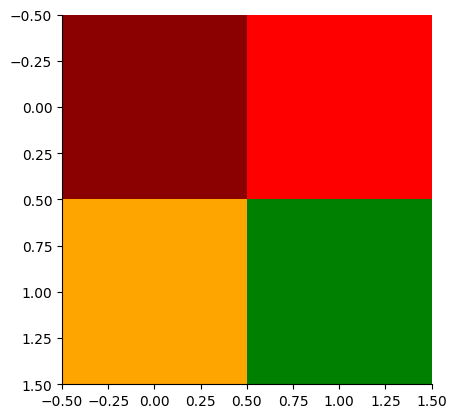

In [55]:
from matplotlib.colors import LinearSegmentedColormap

colors = ["darkred", "red", "orange", "green"]
cmap = LinearSegmentedColormap.from_list("my_cmap", colors)

plt.imshow([[0, 1], [2,3]], cmap=cmap)
plt.show()

In [56]:
df_street.shape

(128, 207)

In [57]:
color_columns = [f"traffic_color_{i}" for i in range(34)]
color2index ={"darkred":0, "red":1, "orange":2, "green":3}
index_columns= []
for idx, colom in enumerate(color_columns):
    df_street[f"index_color_{idx}"] = df_street[colom].map(color2index)
    index_columns.append(f"index_color_{idx}")
traffic_color_matrix = df_street[index_columns].fillna(3).to_numpy()
traffic_color_matrix

/var/folders/l3/cl401yld1x3f35c0g3sbm3b80000gp/T/ipykernel_99846/407041901.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_street[f"index_color_{idx}"] = df_street[colom].map(color2index)
/var/folders/l3/cl401yld1x3f35c0g3sbm3b80000gp/T/ipykernel_99846/407041901.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_street[f"index_color_{idx}"] = df_street[colom].map(color2index)
/var/folders/l3/cl401yld1x3f35c0g3sbm3b80000gp/T/ipykernel_99846/407041901.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is us

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.]])

In [58]:
traffic_color_matrix.shape

(128, 34)

In [59]:
from matplotlib.text import Text
import matplotlib.dates as mdates

In [60]:
time = df_street.index

In [61]:
traffic_color_matrix.shape

(128, 34)

/var/folders/l3/cl401yld1x3f35c0g3sbm3b80000gp/T/ipykernel_99846/2555866800.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xlabels);


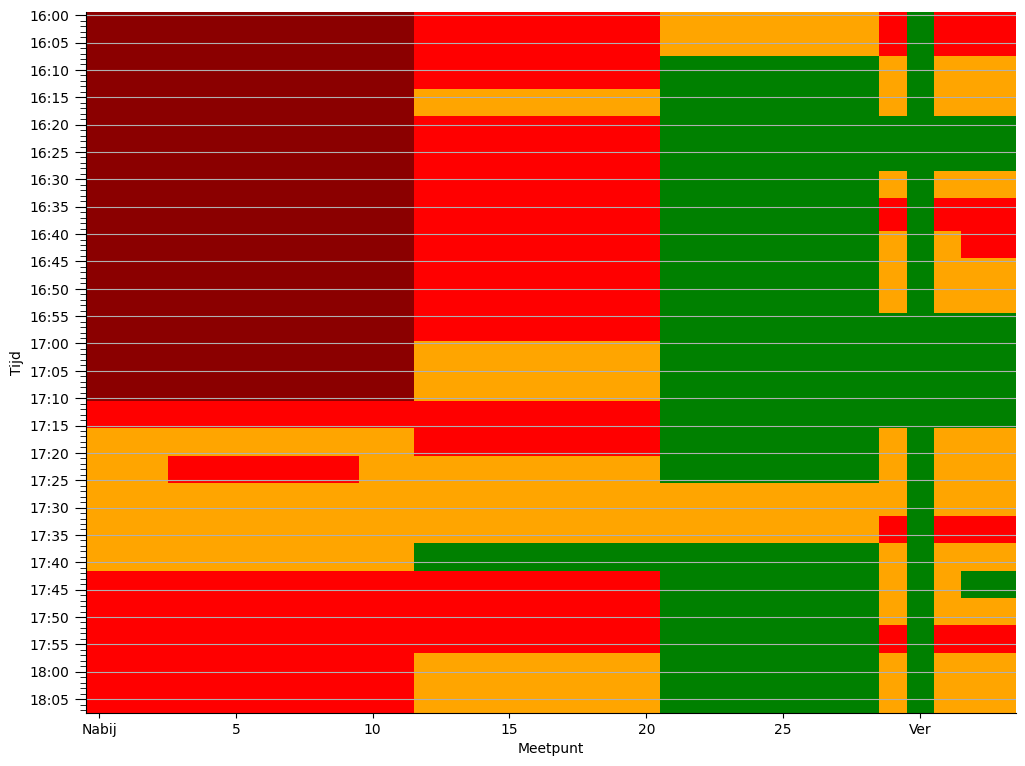

In [64]:
fig, ax = plt.subplots(figsize=(12, 12))
# plt.figure().set_figheight(1)
# plt.figure().set_figwidth(10)

# plt.axis('off');
ax.set_xlabel("Meetpunt")
ax.set_ylabel("Tijd");
# ax.set_xticks([]);
# ax.set_yticks([]);


# # Calculate the number of minutes between each tick
# minutes_per_tick = 1

# # Calculate the total number of ticks based on the number of rows
# num_ticks = len(traffic_color_matrix)

# # Create an array of tick locations
# tick_locations = np.arange(0, num_ticks, minutes_per_tick)

# Create an array of tick labels (assuming they are in minutes)
# tick_labels = [str(i * minutes_per_tick) for i in range(len(tick_locations))]
ticks = df_street.index
tick_labels = [f"{tick:%H:%M}" if idx%5==0 else "" for idx, tick in enumerate(ticks)]
major_tick_labels = [f"{tick:%H:%M}"  for idx, tick in enumerate(ticks) if idx%5==0]

# Plot the matrix using imshow on the specified axis
ax.imshow(traffic_color_matrix, cmap=cmap, aspect=0.2);

# Set y-axis tick locations and labels
ax.set_yticks(list(range(df_street.shape[0])), minor=True)
ax.set_yticks(list(range(0, df_street.shape[0], 5)), minor=False)
ax.set_yticklabels(major_tick_labels, minor=False)

# # Remove values for minor tick labels
# minor_labels = ['' for _ in ax.get_yticks(minor=True)]
# ax.set_yticklabels(minor_labels, minor=True)

# # Set the major locator and formatter for y-axis
# ax.yaxis.set_major_locator(mdates.MinuteLocator(interval=5))  # Set major ticks every 5 minutes
# ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format major ticks as HH:MM

# Set the minor locator and formatter for y-axis
# ax.yaxis.set_minor_locator(mdates.MinuteLocator(interval=1))  # Set minor ticks every 1 minute
# ax.yaxis.set_minor_formatter(mdates.DateFormatter('%M'))  # Format minor ticks as minutes


# Customize tick parameters to make major ticks longer
ax.tick_params(axis='y', which='major', size=8)  # Adjust the size as needed
ax.tick_params(axis='y', which='minor', size=4)

# Add gridlines for the y-axis at major y-tick positions
ax.yaxis.grid(True, which='major')

# Hide gridlines for the x-axis
ax.xaxis.grid(False)

# # Remove y-labels for the minor ticks
# ax.set_yticklabels([], minor=True)

# # Set the x-axis major locator to every 15 minutes
# ax.yaxis.set_major_locator(mdates.MinuteLocator(interval=15))
# # Format the x-axis major ticks as hours and minutes
# ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ylabels = ax.get_yticklabels()
# for idx, label in enumerate(ylabels):
#     ylabels[idx].set_text('')
#     if idx == 1:
#         ylabels[1].set_text('16u')
#     if idx == len(ylabels)-2:
#         ylabels[-2].set_text('18u')
# ax.set_yticklabels(ylabels);
xlabels = ax.get_xticklabels()
for idx, label in enumerate(xlabels):
    # xlabels[idx].set_text('')
    if idx == 1:
        xlabels[1].set_text('Nabij')
    if idx == len(xlabels)-1:
        xlabels[-2].set_text('Ver')
ax.set_xticklabels(xlabels);


plt.savefig(
    "leuven_tiensesteenweg_231017_16u_18u.png",  # Set path and filename
    dpi=300,  # Set dots per inch
    bbox_inches="tight",  # Remove extra whitespace around plot
    facecolor="white",
)  # Set background color to white


In [65]:
df_street

,location,street,path,color_0,p0_red,p0_green,p0_blue,color_1,p1_red,p1_green,...,index_color_24,index_color_25,index_color_26,index_color_27,index_color_28,index_color_29,index_color_30,index_color_31,index_color_32,index_color_33
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-17 16:00:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-155734.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,2.0,2.0,2.0,2.0,2.0,1.0,NaN,1.0,1.0,1.0
2023-10-17 16:01:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-155734.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,2.0,2.0,2.0,2.0,2.0,1.0,NaN,1.0,1.0,1.0
2023-10-17 16:02:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-155734.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,2.0,2.0,2.0,2.0,2.0,1.0,NaN,1.0,1.0,1.0
2023-10-17 16:03:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-160247.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,2.0,2.0,2.0,2.0,2.0,1.0,NaN,1.0,1.0,1.0
2023-10-17 16:04:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-160247.png,"[129, 31, 31]",129.0,31.0,31.0,"[129, 31, 31]",129.0,31.0,...,2.0,2.0,2.0,2.0,2.0,1.0,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-17 18:03:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,"[242, 60, 50]",242.0,60.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0
2023-10-17 18:04:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,"[242, 60, 50]",242.0,60.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0
2023-10-17 18:05:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,"[242, 60, 50]",242.0,60.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0
